# Peningkatan atau pengurangan pm 2.5

In [1]:
import glob
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import xarray as xr


from netCDF4 import Dataset
#Import os, os environ untuk mengatasi error pada basemap, kalau basemapnya ngga error hapus aja
#Sesuaikan letak file epsg di komputer
import os 
os.environ["PROJ_LIB"] = "C:\\Users\\Lenovo\\anaconda3\\pkgs\\proj4-5.2.0-h6538335_1006\\Library\\share"; #fixr
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap

In [2]:
# baca semua lokasi data TRMM

path = glob.glob('data selisih fix/*.nc4', recursive=True)

pathfiles = []
for filename in path:
    pathfiles.append(filename)
pathfiles = np.array(pathfiles)
print(pathfiles)

['data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120701.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120702.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120703.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120704.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120705.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120706.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120707.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120708.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120709.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120710.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120711.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120712.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120713.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120714.nc4.nc4'
 'data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120715.nc4.nc4'
 'data selisih fix\\MERRA

In [3]:
# baca semua data TRMM dan ambil variabel hujan

nt = pathfiles.size
SS = np.empty(shape=(nt,24,41,78))
OC = np.empty(shape=(nt,24,41,78))
BC = np.empty(shape=(nt,24,41,78))
SO = np.empty(shape=(nt,24,41,78))
DS = np.empty(shape=(nt,24,41,78))


for i in range(nt):
    data = Dataset(pathfiles[i])
    SS[i,:,:] = data['SSSMASS25'][:]
    OC[i,:,:] = data['OCSMASS'][:]
    BC[i,:,:] = data['BCSMASS'][:]
    SO[i,:,:] = data['SO4SMASS'][:]
    DS[i,:,:] = data['DUSMASS25'][:]

In [4]:
PM=(1.375*SO+1.8*OC+BC+DS+SS)*(10**9)
#print(PM)

In [5]:
nt

615

In [6]:
#Data per jam menjadi data rata-rata 1 hari
PM25 = np.empty(shape=(nt, 41,78))
for i in range(nt):
    for j in range(41):
        for k in range(78):
            PM25[i,j,k] = np.mean(PM[i,:,j,k])

In [7]:
#PM25.shape
print(PM25)

[[[14.82849521 14.74072164 14.72348231 ...  6.64486741  6.38571117
    6.16753205]
  [14.22886735 14.32034277 14.33099694 ...  6.03503526  5.86960484
    5.67519047]
  [13.91860907 13.86637782 13.68173663 ...  5.58455375  5.39779299
    5.65275941]
  ...
  [20.44145424 18.13711902 15.99361376 ...  3.71593764  3.71927408
    3.64173578]
  [22.54133403 20.29114579 17.97936652 ...  4.4760185   4.56338032
    4.3069932 ]
  [24.86327863 22.65791284 20.32158746 ...  5.47411758  5.33789582
    4.725874  ]]

 [[15.82412617 15.33013262 14.75496627 ...  9.00741334  9.49688323
   10.6024185 ]
  [15.85136332 15.02683833 13.97704057 ...  9.20882375  9.45207008
   10.82463758]
  [14.42424791 13.38351379 12.39157513 ...  9.23742747  9.77463465
   11.69747618]
  ...
  [17.66478508 17.05177091 16.89197038 ...  3.32559282  3.09522051
    2.91590845]
  [18.75755058 17.99522748 17.52528204 ...  3.25503993  3.1309821
    2.93587316]
  [19.96127174 19.09363945 18.17308018 ...  3.16031111  3.1667962
    3.08

In [8]:
lat = data['lat'][:]
lon = data['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [9]:
# akumulasi data harian menjadi bulanan
pr_das = np.empty(shape=(int(nt/30),41,78))
j = 0

for i in range(int(nt/30)):
    for k in range (41):
        for l in range (78):
            das = np.mean(PM25[j:j+30,k,l])
            pr_das[i,k,l] = das
    j=j+30

In [10]:
pr_das.shape
print(pr_das)

[[[10.51422009 10.32954062 10.249856   ... 11.57263922 11.85179797
   12.12338769]
  [10.27670175 10.10261649  9.98451853 ... 11.78661408 12.30229172
   13.19920148]
  [ 9.96087618  9.90413867  9.83877014 ... 12.10770795 12.92769019
   14.05594422]
  ...
  [18.36029963 17.14627822 16.36749212 ...  4.59544218  4.47491994
    4.40175577]
  [19.55679783 18.30707209 17.32341381 ...  4.54445911  4.48888246
    4.41054836]
  [20.53225068 19.34649631 18.22539165 ...  4.5828675   4.56532583
    4.45193432]]

 [[ 9.98034957 10.05129487 10.11225309 ... 12.39727772 12.25028737
   12.12571995]
  [10.11115975 10.23886787 10.37238863 ... 12.10646278 12.01683751
   12.13444433]
  [10.26941906 10.39200572 10.49022243 ... 11.96533254 12.24118417
   12.61773085]
  ...
  [11.4437659  11.10605427 10.99345688 ...  4.61428032  4.5555115
    4.53904552]
  [12.50930061 12.04741341 11.72933342 ...  4.85643763  4.77971218
    4.73790066]
  [13.75233898 13.21627249 12.73180729 ...  5.05908681  4.95509607
    4.8

In [11]:
pr_das.shape

(20, 41, 78)

In [12]:
#hitung rata-rata bulan juli,ags,sept,okt dari data historis tahun 2012-2014
PM_25 = np.empty([4, 41,78])
for i in range(4):
    for j in range(41):
        for k in range(78):
            PM_25[i,j,k] = np.mean(pr_das[i:369:4,j,k])

In [13]:
PM_25.shape
#banding=pr_das[1,:,:]-pr_das[2,:,:]

(4, 41, 78)

In [28]:
banding=pr_das[12,:,:]-PM_25[0,:,:] #selisih juli 2015 dengan juli data historis
#banding=pr_das[13,:,:]-PM_25[1,:,:] #selisih Agustus 2015 dengan Agustus data historis
#banding=pr_das[14,:,:]-PM_25[2,:,:] #selisih September 2015 dengan September data historis
#banding=pr_das[15,:,:]-PM_25[3,:,:] #selisih Oktober 2015 dengan Oktober data historis

#banding=pr_das[16,:,:]-PM_25[0,:,:] #selisih juli 2016 dengan juli data historis
#banding=pr_das[17,:,:]-PM_25[1,:,:] #selisih Agustus 2016 dengan Agustus data historis
#banding=pr_das[18,:,:]-PM_25[2,:,:] #selisih September 2016 dengan September data historis
#banding=pr_das[19,:,:]-PM_25[3,:,:] #selisih Oktober 2016 dengan Oktober data historis

In [15]:
#levels=[-12,-9,-6,-3,0,3,6,9,12],
#seismic

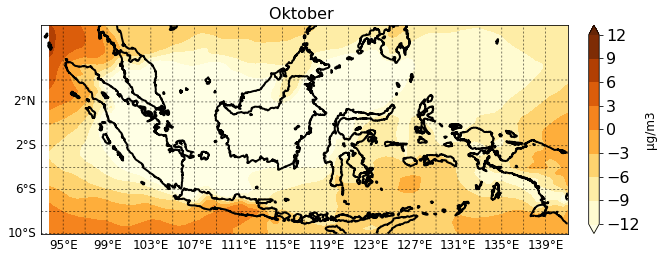

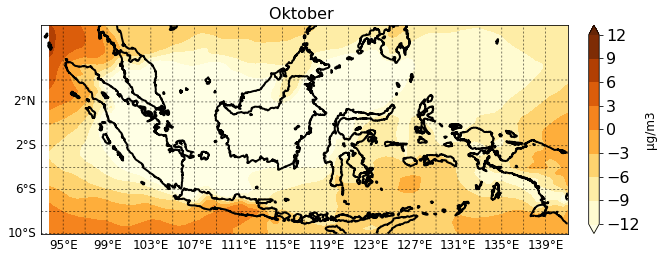

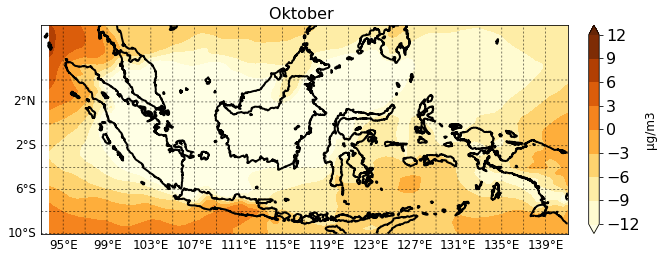

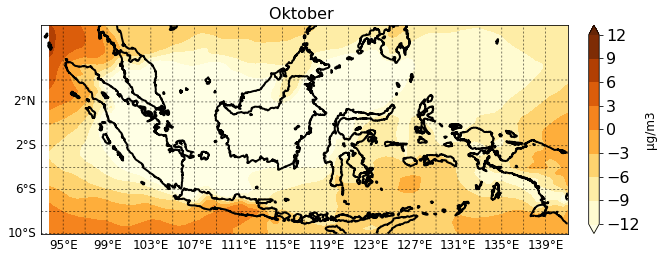

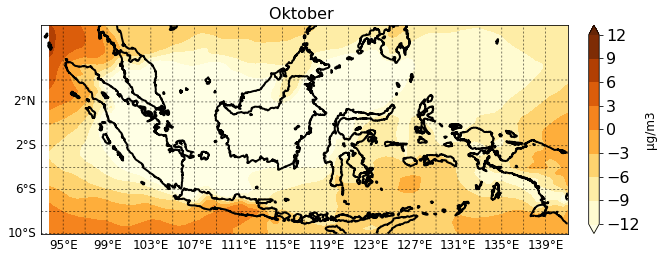

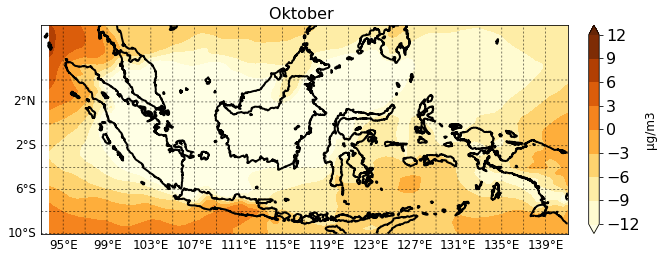

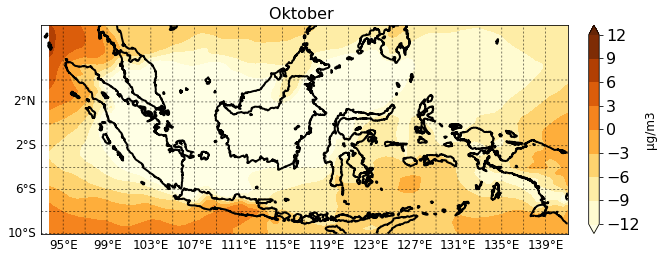

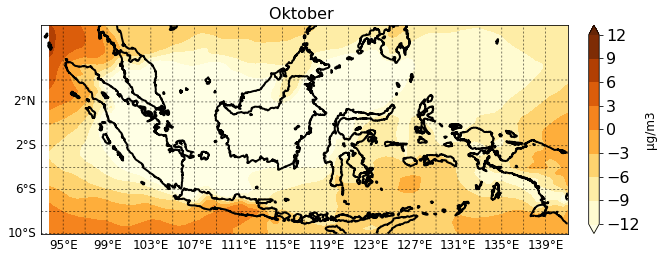

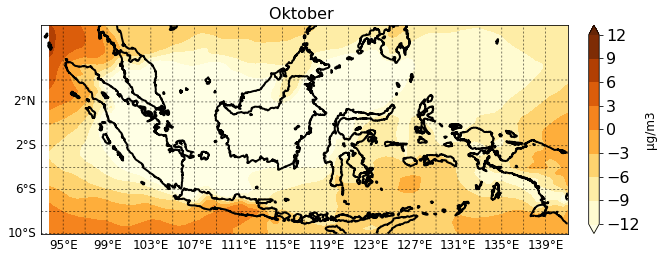

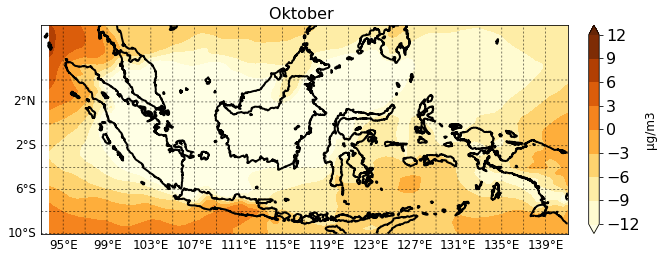

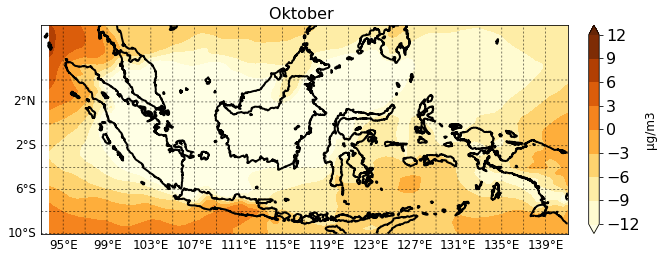

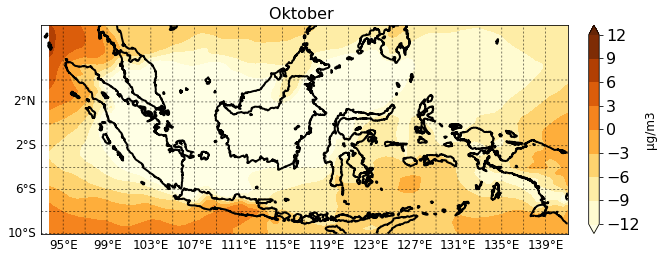

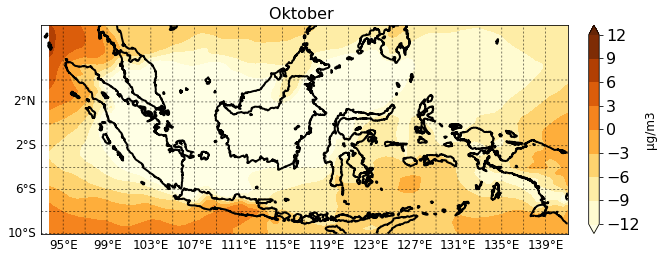

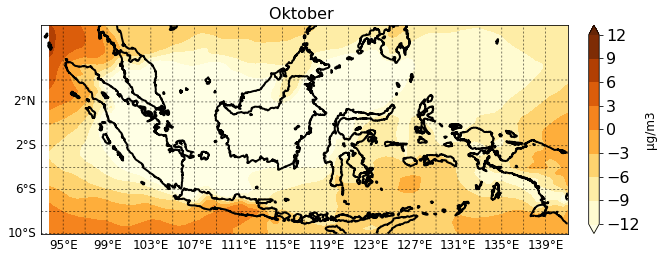

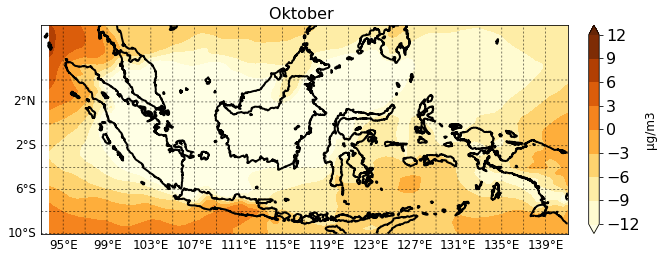

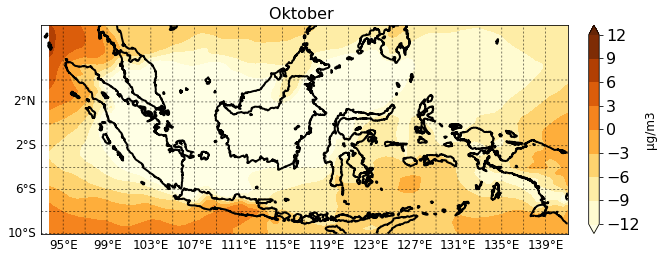

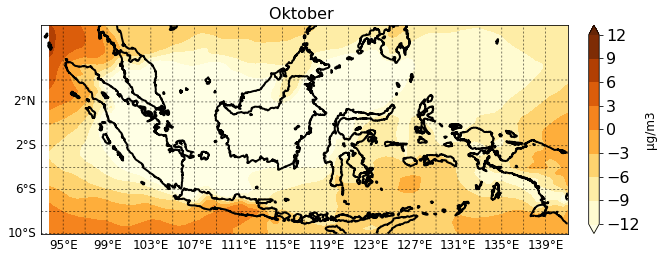

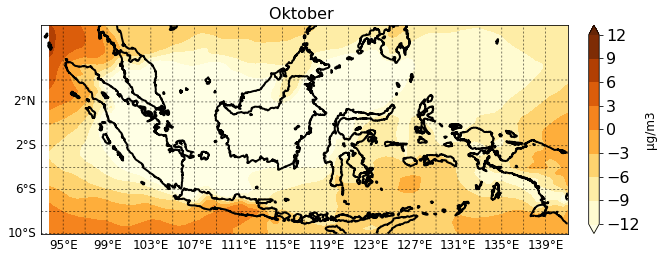

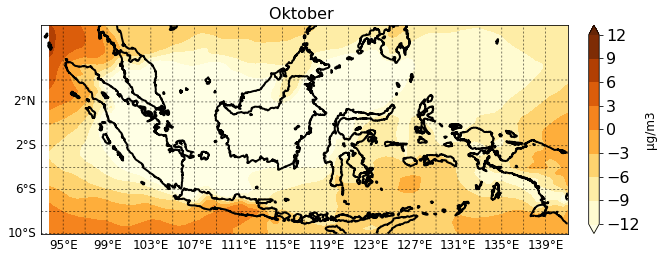

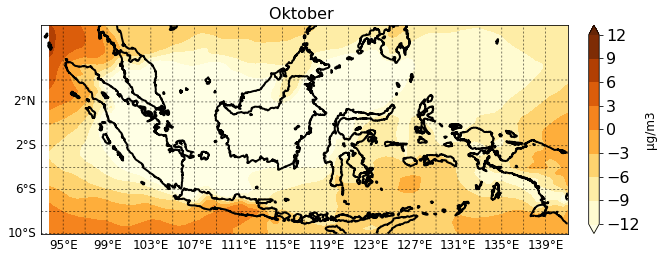

In [18]:
# plot data dasarian
#levels=5
for i in range(20):
    fig = plt.figure(figsize=(10,10))
    #levels = np.arange(50,270,10)

    bm = Basemap(projection='cyl', llcrnrlon=93, llcrnrlat=-10,
                 urcrnrlon=141, urcrnrlat=9, resolution='i') 

    # Add geographic outlines
    bm.drawcoastlines(color='black', linewidth=2, zorder=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Draw parallels and meridians
    bm.drawparallels(np.arange(-10, 6, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lat grid
    bm.drawmeridians(np.arange(95, 141, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lon grid
    bm.drawparallels(np.arange(-10, 6, 4), labels=[1, 0, 0, 0], linewidth=0, dashes=[4, 4], fontsize=12) # lat text
    bm.drawmeridians(np.arange(95, 141, 4), labels=[0, 0, 0, 1], linewidth=0, dashes=[4, 4], fontsize=12) # lon text
    
    contourf = bm.colorbar(bm.contourf(lons, lats, banding[:,:],levels=[-12,-9,-6,-3,0,3,6,9, 12], cmap='YlOrBr', extend='both', zorder=1),
                           location='right', size='2%', pad='4%')
    #contourf = bm.contourf(lons, lats, pr_das[i,:,:],levels=levels, cmap='Blues', extend='both'zorder=1),
                           #location='right', size='2%', pad='4%')
    contourf.set_label('μg/m3', fontsize=12)
    contourf.ax.tick_params(labelsize=16)

    # Add title
    plt.title("Oktober ", fontsize=16)

    # Save image
    #fig.savefig("Oktober "+".png", bbox='tight', dpi=100)

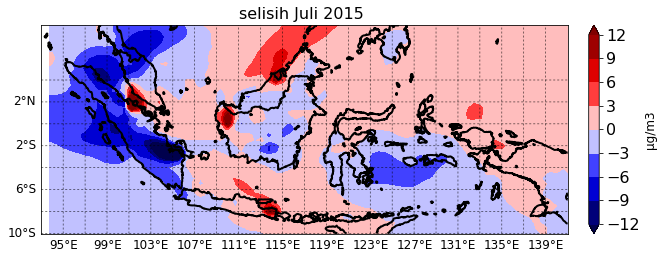

In [29]:
for i in range(1):
    fig = plt.figure(figsize=(10,10))
    #levels = np.arange(50,270,10)

    bm = Basemap(projection='cyl', llcrnrlon=93, llcrnrlat=-10,
                 urcrnrlon=141, urcrnrlat=9, resolution='i') 

    # Add geographic outlines
    bm.drawcoastlines(color='black', linewidth=2, zorder=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Draw parallels and meridians
    bm.drawparallels(np.arange(-10, 6, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lat grid
    bm.drawmeridians(np.arange(95, 141, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lon grid
    bm.drawparallels(np.arange(-10, 6, 4), labels=[1, 0, 0, 0], linewidth=0, dashes=[4, 4], fontsize=12) # lat text
    bm.drawmeridians(np.arange(95, 141, 4), labels=[0, 0, 0, 1], linewidth=0, dashes=[4, 4], fontsize=12) # lon text
    
    contourf = bm.colorbar(bm.contourf(lons, lats, banding[:,:],levels=[-12,-9,-6,-3,0,3,6,9,12], cmap='seismic', extend='both', zorder=1),
                           location='right', size='2%', pad='4%')
    #contourf = bm.contourf(lons, lats, pr_das[i,:,:],levels=levels, cmap='Blues', extend='both'zorder=1),
                           #location='right', size='2%', pad='4%')
    contourf.set_label('μg/m3', fontsize=12)
    contourf.ax.tick_params(labelsize=16)

    # Add title
    plt.title("selisih Juli 2015 ", fontsize=16)

    # Save image
    #fig.savefig("Selisih Juli 2015 "+".png", bbox='tight', dpi=100)